<a href="https://colab.research.google.com/github/saharnazyp/TelemaicVehicle/blob/main/TelemaicVehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

import numpy as np
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import layers, models


from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from sklearn.utils import class_weight

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression




In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
base_path = '/content/drive/MyDrive/DeepLearning/TelemaicVehicle'


os.listdir(base_path)

['allcars.csv', 'v2.csv']

In [5]:
# Mount Google Drive

base_path = '/content/drive/MyDrive/DeepLearning/TelemaicVehicle'

file_allcars = os.path.join(base_path, "allcars.csv")
file_v2 = os.path.join(base_path, "v2.csv")

df_allcars = pd.read_csv(file_allcars)
df_v2 = pd.read_csv(file_v2)


<ipython-input-5-6705edbdbe3f>:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_allcars = pd.read_csv(file_allcars)
<ipython-input-5-6705edbdbe3f>:9: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_v2 = pd.read_csv(file_v2)


In [6]:

print("allcars.csv")
print(df_allcars.head())
print(df_allcars.columns)

print("v2.csv")
print(df_v2.head())
print(df_v2.columns)


allcars.csv
   Unnamed: 0                   timeStamp  tripID  \
0           0  2017-10-31 18:45:59.000000       0   
1           1  2017-10-31 18:46:00.000000       0   
2           2  2017-10-31 18:46:01.000000       0   
3           3  2017-10-31 18:46:02.000000       0   
4           4  2017-10-31 18:46:03.000000       0   

                                             accData  gps_speed  battery  \
0  ffb0fd700220fff43fffe74808e73e03f33400ef33fbe1...        2.2    14.48   
1  00b0fda802e804e14104ed3d01ee3a08ec4c04f738fbd5...        3.7    14.48   
2  00f0fe5002b0fdea4009e33c01ed3701ec4100f53b05e8...        3.9    14.54   
3  0120fdc0028804e03c10de3a09e8400ce43b0ae63b01f4...        3.9    14.56   
4  00a0fde802d816e0370ae73604e23b04e53900e542ffea...        4.7    14.48   

   cTemp  dtc      eLoad  iat  imap  kpl  maf     rpm  speed  tAdv       tPos  \
0    NaN  NaN  44.313725  NaN   NaN  0.0  0.0   903.0    4.0   NaN  15.686275   
1    NaN  NaN  35.294118  NaN   NaN  0.0  0.0   93

In [7]:
df_v2.head()

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
0,1,0.0,2017-12-22 18:43:05,10c0f8e00448fa18c80515d30000000000000000000000...,24.2612,0.0,66.0,0.0,28.6275,40.0,97.0,0.0,0.0,1010.75,23.0,0.0,0.0
1,1,0.0,2017-12-22 18:43:06,1138f8c804780a1ebdf718bcf919d10617c8e301b31017...,23.15,0.0,66.0,0.0,33.7255,40.0,98.0,0.0,0.0,815.5,21.0,0.0,0.0
2,1,0.0,2017-12-22 18:43:07,10f0f89804480612c30010c30714ce0520b7f41dbdf118...,18.7052,0.0,66.0,0.0,43.1373,40.0,98.0,0.0,0.0,862.25,17.0,0.0,0.0
3,1,0.0,2017-12-22 18:43:08,10d0f84804480d15bd0210c9f822c80017caf81ccd0517...,16.4828,0.0,66.0,0.0,41.5686,40.0,97.0,0.0,0.0,817.0,17.0,0.0,0.0
4,1,0.0,2017-12-22 18:43:09,1090f8c80480041dc9081cc50815c60511c60112c40514...,17.4088,0.0,66.0,0.0,43.1373,40.0,97.0,0.0,0.0,804.25,15.0,0.0,0.0


In [8]:
df_allcars.shape


(7214695, 18)

In [9]:
rows, columns = df_allcars.shape
print(f"Rows: {rows}, Columns: {columns}")


Rows: 7214695, Columns: 18


In [10]:
print(f"df_allcars shape: {df_allcars.shape}")
print(f"df_v2 shape: {df_v2.shape}")

df_allcars shape: (7214695, 18)
df_v2 shape: (3120272, 17)


# Convert Data Types in df_v2

In [11]:
df_allcars.info()
df_v2.info()
df_allcars.isnull().sum()
df_v2.isnull().sum()


# Columns that should be numeric (based on df_allcars)
numeric_cols = ['gps_speed', 'battery', 'cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'kpl',
                'maf', 'rpm', 'speed', 'tAdv', 'tPos']

# Convert to float, setting invalid entries to NaN
for col in numeric_cols:
    df_v2[col] = pd.to_numeric(df_v2[col], errors='coerce')

# Optionally convert tripID and deviceID as well
df_v2['tripID'] = pd.to_numeric(df_v2['tripID'], errors='coerce')
df_v2['deviceID'] = pd.to_numeric(df_v2['deviceID'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214695 entries, 0 to 7214694
Data columns (total 18 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   timeStamp   object 
 2   tripID      int64  
 3   accData     object 
 4   gps_speed   float64
 5   battery     float64
 6   cTemp       float64
 7   dtc         float64
 8   eLoad       float64
 9   iat         float64
 10  imap        float64
 11  kpl         float64
 12  maf         float64
 13  rpm         float64
 14  speed       float64
 15  tAdv        float64
 16  tPos        float64
 17  deviceID    int64  
dtypes: float64(13), int64(3), object(2)
memory usage: 990.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120272 entries, 0 to 3120271
Data columns (total 17 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tripID     object
 1   deviceID   object
 2   timeStamp  object
 3   accData    object
 4   gps_speed  object
 5   battery    object
 6   cTemp      object
 7

# Check for Missing Values

In [12]:
print("Missing values in df_allcars:")
print(df_allcars.isnull().sum())

print("\nMissing values in df_v2:")
print(df_v2.isnull().sum())


Missing values in df_allcars:
Unnamed: 0          0
timeStamp           0
tripID              0
accData        158868
gps_speed     2112146
battery       2112146
cTemp         5115495
dtc           5115495
eLoad         2112146
iat           5115495
imap          5115495
kpl           2112146
maf           2112146
rpm           2112146
speed               0
tAdv          5115495
tPos          2112146
deviceID            0
dtype: int64

Missing values in df_v2:
tripID       32
deviceID     32
timeStamp     0
accData       0
gps_speed    32
battery      32
cTemp        32
dtc          32
eLoad        32
iat          32
imap         32
kpl          32
maf          32
rpm          32
speed        32
tAdv         32
tPos         32
dtype: int64


In [13]:
df_allcars.describe()
df_v2.describe()
df_allcars.describe(include='object')
df_v2.describe(include='object')

,timeStamp,accData
count,3120272,3120272
unique,1740023,1811225
top,timeStamp,0
freq,32,425984


**Basic Dataset Comparison**

In [14]:
# Check for unique trip IDs
print("Unique tripIDs in df_allcars:", df_allcars['tripID'].nunique())
print("Unique tripIDs in df_v2:", df_v2['tripID'].nunique())

# Time range check
print("Time range in df_allcars:", df_allcars['timeStamp'].min(), "to", df_allcars['timeStamp'].max())
print("Time range in df_v2:", df_v2['timeStamp'].min(), "to", df_v2['timeStamp'].max())


Unique tripIDs in df_allcars: 1082
Unique tripIDs in df_v2: 431
Time range in df_allcars: 2017-08-30 00:00:00.000000 to 2017-12-31 23:31:04.000000
Time range in df_v2: 2017-11-18 16:23:30 to timeStamp


# Convert timeStamp to DateTime Format

In [15]:
df_allcars['timeStamp'] = pd.to_datetime(df_allcars['timeStamp'], errors='coerce')
df_v2['timeStamp'] = pd.to_datetime(df_v2['timeStamp'], errors='coerce')


# Initial EDA & Visualization

**Plot histogram**

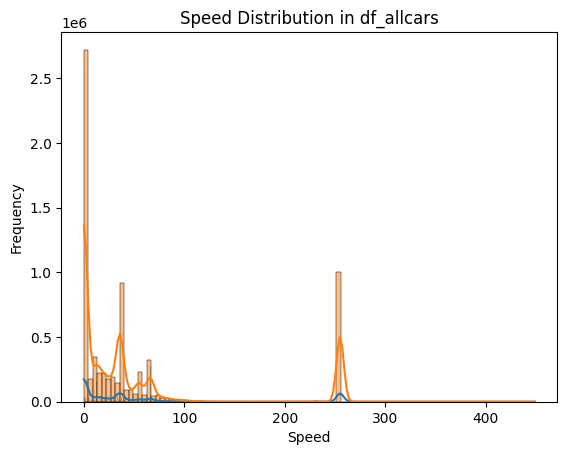

In [16]:
sns.histplot(df_allcars['speed'], kde=True)
sns.histplot(df_allcars['speed'], bins=100, kde=True)
plt.title("Speed Distribution in df_allcars")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.show()

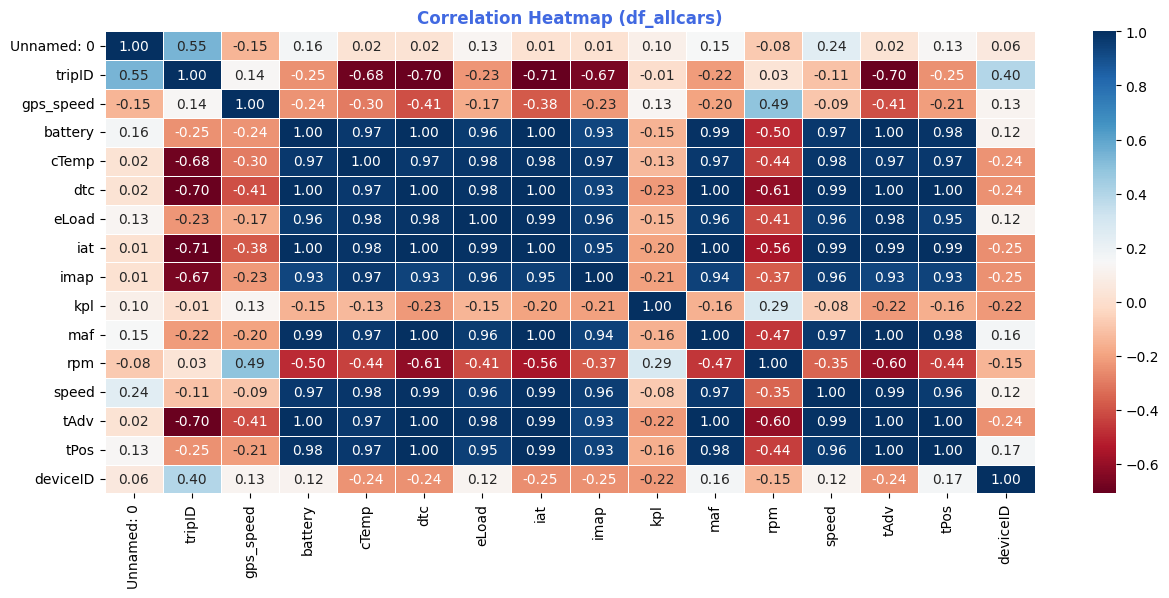

In [17]:
plt.figure(figsize=(15, 6))
dataplot = sns.heatmap(df_allcars.corr(numeric_only=True), cmap='RdBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap (df_allcars)", color='royalblue', weight='bold')
plt.show()



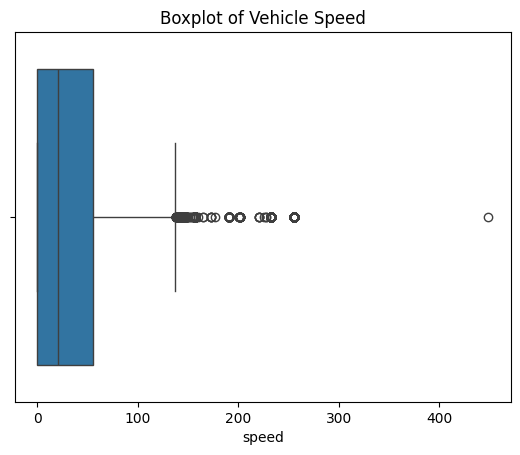

In [18]:
sns.boxplot(x=df_allcars['speed'])
plt.title("Boxplot of Vehicle Speed")
plt.show()

Scatter Plot

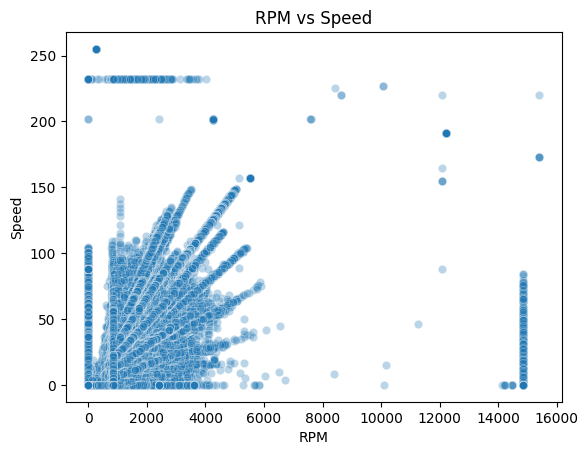

In [19]:
sns.scatterplot(data=df_allcars, x='rpm', y='speed', alpha=0.3)
plt.title("RPM vs Speed")
plt.xlabel("RPM")
plt.ylabel("Speed")
plt.show()


Pairplot

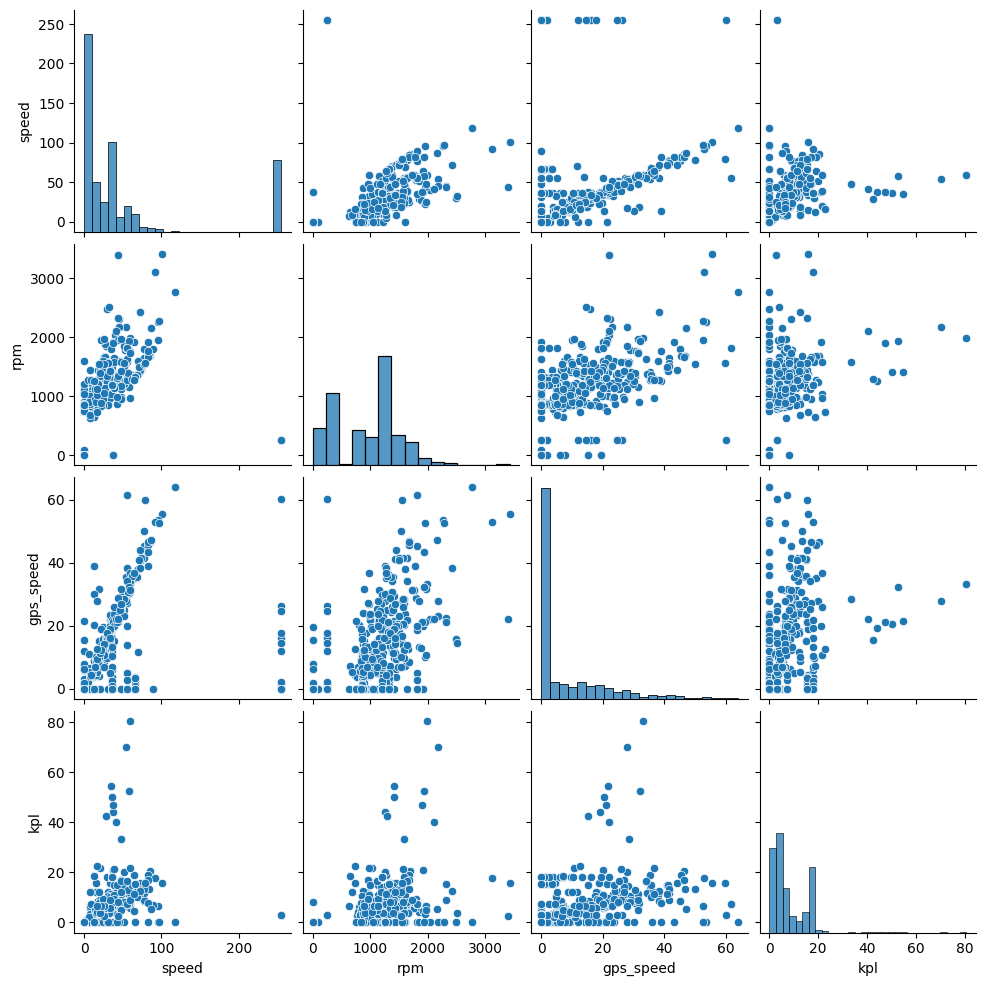

In [20]:
sample = df_allcars.sample(1000, random_state=42)
sns.pairplot(sample[['speed', 'rpm', 'gps_speed', 'kpl']])
plt.show()


Missing Values

**Calculate the cross-tabulation**

In [21]:
pd.crosstab(index=df_allcars['tripID'], columns=df_allcars['deviceID'])


deviceID,1,2,4,5,8,11,12,13,15,16,...,37,38,43,44,45,46,47,50,51,53
tripID,,,,,,,,,,,,,,,,,,,,,
0,1383,348,904,60948,198,2684,4403,431,1357,234403,...,790,2624,3976,1032,2385,17669,780,36753,238,4658
1,1,5,6,1,11,4,983,20,9,0,...,5,243,2,5,17,6,2,82,70,23
2,3,10,27310,550,1193,10,712,139,5,0,...,20,2499,92,3281,298,1136,165,62,658,426
3,43,652,604,883,1425,165,37,288,1,0,...,415,1033,123,301,211,355,2038,32,667,577
4,15,838,75,1385,257,1629,2,171,8,0,...,1361,252,56,147,1219,893,396,14,520,924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,165
1078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581
1079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1067


In [22]:
pd.crosstab(df_allcars['deviceID'], df_allcars['dtc'])


dtc,0.0,255.0
deviceID,,
2,106460,0
12,0,216
16,0,234403
22,0,78013
23,0,10979
24,0,40139
43,203125,607
45,353440,19
46,0,600236


In [23]:
pd.crosstab(df_allcars['deviceID'], df_allcars['dtc'], normalize='index') * 100


dtc,0.0,255.0
deviceID,,
2,100.000000,0.000000
12,0.000000,100.000000
16,0.000000,100.000000
22,0.000000,100.000000
23,0.000000,100.000000
24,0.000000,100.000000
43,99.702060,0.297940
45,99.994625,0.005375
46,0.000000,100.000000


Box Plot / Violin Plot for Battery by DeviceID

In [24]:

print(df_allcars.isna().sum())


Unnamed: 0          0
timeStamp           0
tripID              0
accData        158868
gps_speed     2112146
battery       2112146
cTemp         5115495
dtc           5115495
eLoad         2112146
iat           5115495
imap          5115495
kpl           2112146
maf           2112146
rpm           2112146
speed               0
tAdv          5115495
tPos          2112146
deviceID            0
dtype: int64


In [25]:
df_allcars = df_allcars.dropna()

In [26]:
df_allcars = df_allcars.fillna(0)
print((df_allcars == float('inf')).sum())
df_allcars = df_allcars.replace([float('inf'), -float('inf')], 0)

Unnamed: 0    0
timeStamp     0
tripID        0
accData       0
gps_speed     0
battery       0
cTemp         0
dtc           0
eLoad         0
iat           0
imap          0
kpl           0
maf           0
rpm           0
speed         0
tAdv          0
tPos          0
deviceID      0
dtype: int64


In [27]:
numeric_df = df_allcars.select_dtypes(include=[np.number])
cond_number = np.linalg.cond(numeric_df.corr())

print(f"Condition number: {cond_number}")
numeric_df = df_allcars.select_dtypes(include=[np.number])

matrix = numeric_df.corr()

matrix += np.eye(matrix.shape[0]) * 1e-5


print(matrix)

Condition number: 129257.67350557516
            Unnamed: 0    tripID  gps_speed   battery     cTemp       dtc  \
Unnamed: 0    1.000010  0.506980   0.002550  0.021248  0.020133  0.021965   
tripID        0.506980  1.000010   0.251964 -0.701187 -0.683212 -0.701134   
gps_speed     0.002550  0.251964   1.000010 -0.406435 -0.297176 -0.406800   
battery       0.021248 -0.701187  -0.406435  1.000010  0.968803  0.999615   
cTemp         0.020133 -0.683212  -0.297176  0.968803  1.000010  0.967758   
dtc           0.021965 -0.701134  -0.406800  0.999615  0.967758  1.000010   
eLoad         0.012575 -0.699346  -0.350597  0.983971  0.976381  0.983868   
iat           0.013338 -0.709029  -0.380745  0.995305  0.984952  0.995093   
imap          0.013339 -0.668496  -0.227687  0.930185  0.971937  0.933403   
kpl           0.007295  0.196153   0.402893 -0.212042 -0.131955 -0.226250   
maf           0.028617 -0.693159  -0.387866  0.998385  0.973125  0.998949   
rpm          -0.050856  0.380789   0.68

In [28]:
numeric_df = df_allcars.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr().abs()


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


reduced_df = numeric_df.drop(columns=to_drop)

print("remove columns", to_drop)

remove columns ['cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'maf', 'speed', 'tAdv', 'tPos']


In [29]:

# Load your v2.csv (assuming you've already mounted the drive and read df_v2)
df = df_v2.copy()

# Convert gps_speed to numeric and clean it
df = df[pd.to_numeric(df['gps_speed'], errors='coerce').notnull()]
df['gps_speed'] = df['gps_speed'].astype(float)

# Derive features
df['acceleration'] = df.groupby('tripID')['gps_speed'].diff().fillna(0)
df['angle_change'] = df.groupby('tripID')['acceleration'].diff().fillna(0)
df['acceleration_squared'] = df['acceleration'] ** 2
df['angle_change_squared'] = df['angle_change'] ** 2

# Select features
features = ['gps_speed', 'acceleration', 'angle_change', 'acceleration_squared', 'angle_change_squared']
df_features = df[['tripID'] + features].copy()

# Normalize to [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
df_features[features] = scaler.fit_transform(df_features[features])

# Build X array (shape: samples × 300 × 5)
X = []
trip_ids_used = []
for trip_id in df_features['tripID'].unique():
    trip_data = df_features[df_features['tripID'] == trip_id][features].values
    if len(trip_data) >= 300:
        X.append(trip_data[:300])
        trip_ids_used.append(trip_id)

X = np.array(X)
print("✅ X shape:", X.shape)

<ipython-input-29-da60ec6050fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gps_speed'] = df['gps_speed'].astype(float)
<ipython-input-29-da60ec6050fb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acceleration'] = df.groupby('tripID')['gps_speed'].diff().fillna(0)


✅ X shape: (431, 300, 5)


In [33]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])


In [30]:
# Create y using trip_ids_used from above
trip_stats = df.groupby('tripID').agg({'speed': 'mean'})


label_map = trip_stats.set_index('tripID')['label'].to_dict()
y = np.array([label_map.get(tid, 0) for tid in trip_ids_used])  # fallback = 0 if missing

print("✅ y shape:", y.shape)
print("🔢 Label distribution:", np.bincount(y))


KeyError: "None of ['tripID'] are in the columns"

In [ ]:
model = Sequential()

# First Convolution Block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(300, 5, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolution Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Change to softmax if multi-class

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train.flatten()
)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), class_weight=dict(enumerate(class_weights)))

In [ ]:
print(X.shape)


In [ ]:
num_samples = 982500 // 16384
print(num_samples)  # this will give the number of samples


In [ ]:
total_elements = X.size
print("Total elements in X:", total_elements)


In [ ]:
num_samples = total_elements // (300 * 5)
print("Number of samples:", num_samples)



In [ ]:
X = X.reshape(num_samples, 300, 5)
print("New shape of X:", X.shape)


In [ ]:
# Check the original shape of X
print("Original shape of X:", X.shape)

# Calculate total elements in X
total_elements = X.size
print("Total elements in X:", total_elements)

# Calculate num_samples
num_samples = total_elements // (300 * 5)
print("Number of samples:", num_samples)

# Reshape if the total elements match
X = X.reshape(num_samples, 300, 5)
print("New shape of X:", X.shape)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build CNN model
model = Sequential()

# 2D Convolution layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 5, 1)))  # Adjust to appropriate shape

# Max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the data
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Output layer (for example, for binary classification)
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [ ]:
predictions = model.predict(X_test)


In [ ]:
model.save('my_model.h5')
